In [452]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
import pandas as pd

##  Webex Chat Analysis

In [453]:
time_segment = pd.read_excel(r"C:\Users\10103712\Desktop\Time Stamp Segmentation VS Topic Discussion Based on FB Recording (1).xlsx")

In [454]:
time_segment.head(40)

,Hour,Min,Sec,Time,Segment
0,0,10,56,09:00:00,Start
1,0,21,23,09:10:27,Kebajikan Warga Kerja dan Kemampuan Syarikat: Satu Tanggungjawab
2,0,27,16,09:16:20,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
3,0,31,17,09:20:21,Kos Perbelanjaan Syarikat Membiyai Ganjaran dan Faedah
4,0,33,50,09:22:54,Kadar Perlarasan Gaji
5,0,35,40,09:24:44,Penjelasan Ex-Gratia
6,0,37,0,09:26:04,Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu
7,0,40,33,09:29:37,Jurang Gaji di antara Eksekutif dan Bukan Eksekutif
8,0,43,25,09:32:29,Perbandingan Jumlah Artikel yang Diulangkaji Diantara CA10 & CA11
9,0,44,18,09:33:22,Ringkasan Pelarasan CA11 yang Bakal Dikuatkuasa pada Mac 2024


In [466]:
df = pd.read_csv('webex_chat_ceo_live.csv')

df = df.drop(columns=['Unnamed: 0'])

In [467]:
# Convert 'time' column in df2 to datetime format
df['timestamp'] = pd.to_datetime(df['time'], format='%H:%M')

# Convert 'Sec' column in df1 to datetime format
time_segment['time_frame'] = pd.to_datetime(time_segment['Time'], format='%H:%M:%S')

# Merge DataFrame 2 with DataFrame 1 based on the nearest time
merged_df = pd.merge_asof(df, time_segment, left_on='timestamp', right_on='time_frame', direction='backward')

In [468]:
merged_df.loc[merged_df['Segment'].isna(), 'Segment'] = 'Start'

In [469]:
merged_df = merged_df.drop(columns = ['Time','time_frame','Hour','Min','Sec'])

In [472]:
merged_df[100:300]

,time,name,chat_content,timestamp,Segment
100,09:17,Nur Atiqah,Kos memang akan sentiasa meningkat sbb kos sara hidup meningkat. Itu asas.,1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
101,09:17,anitah,summary awal...akhirnye kita semua ttp kena akur... kita tengoklah summary ni berubah ke tak akhir sesi nnti,1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
102,09:17,MUHAMMAD SYAMIL BIN ZULKIFLI,"abang akak semua harap faham . tujuan live ini adalah untuk pencerahan tentang apa yang telah di tandatangani. semua ini tidak berubah dah , tggu CA 12 je nanti .",1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
103,09:17,Mohd Hairulanuar Bin Moni,"abang akak semua harap faham . tujuan live ini adalah untuk pencerahan tentang apa yang telah di tandatangani. semua ini tidak berubah dah , tggu CA 12 je nanti .",1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
104,09:17,Muhammad Aiman Hakim b. Ibrahim,daripada statistik tu berapa goes to M level ye?,1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
105,09:17,inwzA,"@muhamad Syamil.. klu setakat nak pencerahan, rasa nya xperlu nk buat live ni. print buku, semua pakat baca.",1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
106,09:17,Mohamad Nor Fazlee bin Mohamad Ali,"kenaikan tanpa pandang kpi, apa fungsi kpi selama ni? sbb semuanya dpt % yang sama",1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
107,09:17,Amat,waalaikumusalam 4%,1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
108,09:17,Mie,CA 11 dan sebelum ni kekal sama 4% kenapa ya?,1900-01-01 09:17:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB
109,09:18,Mie,kgt pon 4%,1900-01-01 09:18:00,Senarai Ganjaran dan Faedah yang Komprehensif di TNB


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          1651 non-null   object        
 1   name          1651 non-null   object        
 2   chat_content  1651 non-null   object        
 3   timestamp     1651 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 51.7+ KB


In [479]:
import re 
import string
import emoji
emoticon_mapping = {
    ':)': 'happy',
    ':(': 'sad',
    ':D': 'laugh'
    # Add more emoticons and their corresponding text as needed
}

merged_df['chat_content'].astype(str)

merged_df['cleaned'] = merged_df['chat_content'].replace(emoticon_mapping)

merged_df['cleaned'] = merged_df['cleaned'].apply(lambda x: emoji.demojize(str(x)))

# df['cleaned'] = df['cleaned'].apply(lambda x: x.lower())
# df['cleaned'] = df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation + '0-9'), '', x))

In [480]:
def classify_statement(input_text):
    if input_text.endswith('?'):
        return 'question'
    else:
        return 'statement'
    
    
merged_df['chat_type'] = merged_df['chat_content'].apply(classify_statement)

In [375]:
label = {'LABEL_0':'negative', 'LABEL_1': 'neutral','LABEL_2':'positive'}

## Predict Sentiment

In [373]:
from transformers import T5ForSequenceClassification,AutoTokenizer
# Load model directly

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(r"C:\Users\10103712\Documents\Bert_Bahasa_Sentiment")
model = AutoModelForSequenceClassification.from_pretrained(r"C:\Users\10103712\Documents\Bert_Bahasa_Sentiment")

In [374]:
outputs = tokenizer("ok", return_tensors="pt")

outputs

{'input_ids': tensor([[  101, 13563,   102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}

In [376]:
logits = model(**outputs).logits
predicted_class_id = logits.argmax().item()
mok = model.config.id2label[predicted_class_id]

label[mok]

'neutral'

In [484]:
from tqdm import tqdm

for x in tqdm(range(len(df))):
    outputs = tokenizer(merged_df.loc[x,'cleaned'], return_tensors="pt")
    logits = model(**outputs).logits
    predicted_class_id = logits.argmax().item()
    result = model.config.id2label[predicted_class_id]
    merged_df.loc[x,'sentiment'] = label[result]

100%|██████████████████████████████████████████████████████████████████████████████| 1651/1651 [01:44<00:00, 15.74it/s]


# Summary Statistics

## Most Frequent Chat User

In [595]:
chat_occurence_name = pd.DataFrame(merged_df.name.value_counts())
chat_occurence_name.head(10)

,count
name,
10095831,68
MUHAMMAD SYAMIL BIN ZULKIFLI,64
Ahmad Jazimin,45
ibrahim,44
mohd aswad,41
Adib,39
Muhammad Nursyaraffi b. Mohd Nazri,37
Mie,31
Mohd Faizal,27


## Top Question By Each Person

In [596]:
frequency_counts = merged_df.groupby(['name', 'chat_content']).size().reset_index(name='frequency')

sorted_df = frequency_counts.sort_values(by='frequency', ascending=False)

sorted_df.head(20)

,name,chat_content,frequency
86,Adib,boleh terangkan formula OT yang digunakan dimana faktor 26hari sebulan sedangkan kita bekerja purata 22hari sebulan..,39
54,10095831,Pemberian bonus senyap2 tidak berintegriti,39
116,Ahmad Jazimin,Mohon jelaskan kenapa formula OT di guna pekali 26 hari bekerja????,38
594,Muhammad Nursyaraffi b. Mohd Nazri,Dato seri . soalan tadi berkenaan lantikan Genco . mohon ulang sekali lagi . tadi ada mic problem,36
459,Mohd Faizal,❤️,25
297,MUHAMMAD SYAMIL BIN ZULKIFLI,Dato seri . soalan tadi berkenaan lantikan Genco . mohon ulang sekali lagi . tadi ada mic problem,19
508,Mohd Raziq b. Khirudin,"Untuk staff e12 yang dah lama bertugas, gaji kami walaupun include adjustment dah dekat sama level/lower dengan staff baru, atau ada pelarasan gradual? jika entry level RM3.1k naik RM800, adakah existing E12 staff naik juga dalam rm800?",16
304,MUHAMMAD SYAMIL BIN ZULKIFLI,"abang akak semua harap faham . tujuan live ini adalah untuk pencerahan tentang apa yang telah di tandatangani. semua ini tidak berubah dah , tggu CA 12 je nanti .",15
812,Siti Ruhaidah Hamzah,Mohon pertimbangkan jumlah exgratia supaya dinaikkan ke 0.5 bulan gaji,13
987,ibrahim,"hapuskan SBU, DN, AD, APP dsbnya sbb ianya akan merosakkan kapap TNB, mohon balik ke struktut asal",12


## Overall Sentiment Percentage

<Axes: xlabel='sentiment', ylabel='count'>

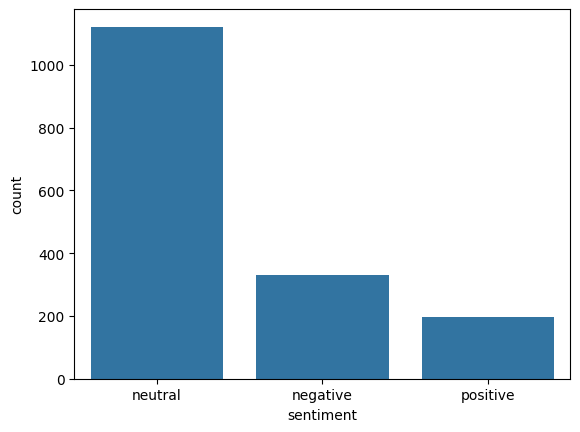

In [598]:
import seaborn as sns

sns.barplot(merged_df.sentiment.value_counts())

## Sentiment By Segment

In [602]:
frequency_counts = merged_df.groupby(['sentiment', 'Segment']).size().reset_index(name='frequency')

sorted_df = frequency_counts.sort_values(by=['Segment'], ascending=False)

sorted_df.head(30)

,sentiment,Segment,frequency
70,positive,[Ulang] Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,6
47,neutral,[Ulang] Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,132
23,negative,[Ulang] Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,14
69,positive,[Ulang] Pembayaran Berdasarkan Ketetapan CA11,15
46,neutral,[Ulang] Pembayaran Berdasarkan Ketetapan CA11,95
22,negative,[Ulang] Pembayaran Berdasarkan Ketetapan CA11,23
68,positive,[Ulang] Jurang Perbezaan Gaji Eksekutif dan Bukan Eksekutif,1
45,neutral,[Ulang] Jurang Perbezaan Gaji Eksekutif dan Bukan Eksekutif,13
21,negative,[Ulang] Jurang Perbezaan Gaji Eksekutif dan Bukan Eksekutif,4
44,neutral,[Ulang] Gaji Mati,26


## Most Frequent User By Segment

In [605]:
most_frequent_user_by_segment = merged_df.groupby('Segment')['name'].agg(lambda x: x.value_counts().idxmax())

result_df = pd.DataFrame(most_frequent_user_by_segment)
result_df.columns = ['Most Frequent User']

result_df['Frequency'] = merged_df.groupby('Segment')['name'].agg(lambda x: x.value_counts().max()).values


result_df

,Most Frequent User,Frequency
Segment,,
Jurang Gaji di antara Eksekutif dan Bukan Eksekutif,MUHAMMAD SYAMIL BIN ZULKIFLI,6
Kadar Perlarasan Gaji,inwzA,4
Kebajikan Warga Kerja dan Kemampuan Syarikat: Satu Tanggungjawab,MUHAMMAD SYAMIL BIN ZULKIFLI,3
Keperluan Sumber Tenaga Kerja di TNB,10095831,4
Kos Perbelanjaan Syarikat Membiyai Ganjaran dan Faedah,HR Nea,4
Penambahbaikan melalaui Perbincangan di Luar CA turut Diteruskan,ibrahim,6
Penjelasan Ex-Gratia,10094578,4
Penutupan Sesi FB Live Bersama CEO,10095831,13
Perbandingan Jumlah Artikel yang Diulangkaji Diantara CA10 & CA11,Muhammad 'Arief Hafizie,3


In [610]:
stopwords = pd.read_csv('stopwords.txt',header=None, names=['Stopword'])

istopwords = stopwords['Stopword'].to_list()
istopwords.extend(['tadi','dh','yang','tu','sbb','sebab','dah','tu','yg','yang','ni','je','x','tak','dato'])

## Top 5 Keywords Each Segment

In [611]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

keyword_counts = []
stop_words = istopwords


for segment in merged_df['Segment'].unique():
    segment_data = merged_df[merged_df['Segment'] == segment]
    
    tokens = [word.lower() for content in segment_data['chat_content'] for word in word_tokenize(content) if word.isalpha() and word.lower() not in istopwords]
    
    word_freq = pd.Series(tokens).value_counts().reset_index()
    word_freq.columns = ['Keyword', 'Frequency']
    
    top_keywords = word_freq.head(5)['Keyword'].tolist()
    
    keyword_counts.append({'Segment': segment, 'Top_Keywords': top_keywords})

top_keywords_df = pd.DataFrame(keyword_counts)

In [612]:
top_keywords_df

,Segment,Top_Keywords
0,Start,"[assalamualaikum, wsalam, salam, selamat, pagi]"
1,Kebajikan Warga Kerja dan Kemampuan Syarikat: Satu Tanggungjawab,"[pencerahan, ca, mohon, staff, akak]"
2,Senarai Ganjaran dan Faedah yang Komprehensif di TNB,"[ca, gaji, berubah, kos, pencerahan]"
3,Kos Perbelanjaan Syarikat Membiyai Ganjaran dan Faedah,"[live, fb, tnb, kerja, ca]"
4,Kadar Perlarasan Gaji,"[ot, rm, gaji, kerani, overtime]"
5,Penjelasan Ex-Gratia,"[ot, la, kerja, nak, gaji]"
6,Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,"[gaji, tnb, mati, exec, ot]"
7,Jurang Gaji di antara Eksekutif dan Bukan Eksekutif,"[gaji, mati, la, staff, tap]"
8,Perbandingan Jumlah Artikel yang Diulangkaji Diantara CA10 & CA11,"[naik, ceo, gaji, tahun, tuan]"
9,Ringkasan Pelarasan CA11 yang Bakal Dikuatkuasa pada Mac 2024,"[mohon, lantikan, genco, terpakai, gaji]"


## Top 5 2gram words in each Segment

In [615]:
from nltk import bigrams
bigram_counts = []

for segment in merged_df['Segment'].unique():
    segment_data = merged_df[merged_df['Segment'] == segment]
    
    tokens = [word.lower() for content in segment_data['chat_content'] for word in word_tokenize(content) if word.isalpha() and word.lower() not in istopwords]
    
    bigrams_list = list(bigrams(tokens))
    
    bigram_freq = pd.Series(bigrams_list).value_counts().reset_index()
    bigram_freq.columns = ['Bigram', 'Frequency']
    
    top_bigrams = bigram_freq.head(5)['Bigram'].tolist()
    
    bigram_counts.append({'Segment': segment, 'Top_Bigrams': top_bigrams})

top_bigrams_df = pd.DataFrame(bigram_counts)

In [616]:
top_bigrams_df

,Segment,Top_Bigrams
0,Start,"[(selamat, pagi), (hadir, assalamualaikum), (assalammualaikum, en), (bersama, ceo), (assalamualaikum, selamat)]"
1,Kebajikan Warga Kerja dan Kemampuan Syarikat: Satu Tanggungjawab,"[(live, pencerahan), (abang, akak), (tggu, ca), (berubah, tggu), (tandatangani, berubah)]"
2,Senarai Ganjaran dan Faedah yang Komprehensif di TNB,"[(tandatangani, berubah), (pencerahan, tandatangani), (abang, akak), (akak, harap), (harap, faham)]"
3,Kos Perbelanjaan Syarikat Membiyai Ganjaran dan Faedah,"[(fb, live), (memilih, sertai), (kapasiti, webex), (mohon, warga), (warga, kerja)]"
4,Kadar Perlarasan Gaji,"[(rm, rm), (ketua, pegawai), (jan, rm), (ne, berumur), (fb, live)]"
5,Penjelasan Ex-Gratia,"[(ca, nanti), (tujuan, live), (tangga, gaji), (slps, jam), (kerja, pejabat)]"
6,Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,"[(gaji, mati), (non, exec), (samakan, tnb), (jgn, lalai), (jabatan, tenaga)]"
7,Jurang Gaji di antara Eksekutif dan Bukan Eksekutif,"[(gaji, mati), (harap, faham), (akak, harap), (abang, akak), (tujuan, live)]"
8,Perbandingan Jumlah Artikel yang Diulangkaji Diantara CA10 & CA11,"[(sign, ca), (saranan, kerajaan), (kerajaan, utk), (mati, wujud), (gaji, mati)]"
9,Ringkasan Pelarasan CA11 yang Bakal Dikuatkuasa pada Mac 2024,"[(lantikan, genco), (exgratia, dinaikkan), (bulan, gaji), (dinaikkan, bulan), (jumlah, exgratia)]"


## Top 3gram keywords each segment

In [617]:
from nltk import ngrams

trigram_counts = []

for segment in merged_df['Segment'].unique():
    segment_data = merged_df[merged_df['Segment'] == segment]
    
    tokens = [word.lower() for content in segment_data['chat_content'] for word in word_tokenize(content) if word.isalpha()]
    
    trigrams_list = list(ngrams(tokens, 3))
    
    trigram_freq = pd.Series(trigrams_list).value_counts().reset_index()
    trigram_freq.columns = ['Trigram', 'Frequency']
    
    top_trigrams = trigram_freq.head(5)['Trigram'].tolist()
    
    trigram_counts.append({'Segment': segment, 'Top_Trigrams': top_trigrams})

most_frequent_trigrams_df = pd.DataFrame(trigram_counts)

most_frequent_trigrams_df

,Segment,Top_Trigrams
0,Start,"[(dan, selamat, pagi), (mengenai, perjanjian, kolektif), (bersama, ceo, mengenai), (wsalam, dan, selamat), (yang, dimeterai, ini)]"
1,Kebajikan Warga Kerja dan Kemampuan Syarikat: Satu Tanggungjawab,"[(pencerahan, tentang, apa), (adalah, untuk, pencerahan), (tggu, ca, je), (abang, akak, semua), (akak, semua, harap)]"
2,Senarai Ganjaran dan Faedah yang Komprehensif di TNB,"[(apa, yang, telah), (tentang, apa, yang), (semua, harap, faham), (harap, faham, tujuan), (faham, tujuan, live)]"
3,Kos Perbelanjaan Syarikat Membiyai Ganjaran dan Faedah,"[(di, tnb, powerfaces), (ini, memandangkan, kapasiti), (warga, kerja, untuk), (mohon, warga, kerja), (peserta, sebanyak, mohon)]"
4,Kadar Perlarasan Gaji,"[(hrsselepas, pekeliling, jan), (rm, hrsselepas, pekeliling), (gaji, asas, hari), (asas, hari, orp), (medical, check, up)]"
5,Penjelasan Ex-Gratia,"[(telah, di, tandatangani), (adalah, untuk, pencerahan), (ca, je, nanti), (tggu, ca, je), (dah, tggu, ca)]"
6,Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,"[(jabatan, tenaga, kerja), (jangan, samakan, tnb), (gaji, mati, tu), (executive, or, non), (or, non, executive)]"
7,Jurang Gaji di antara Eksekutif dan Bukan Eksekutif,"[(yang, telah, di), (apa, yang, telah), (akak, semua, harap), (semua, harap, faham), (harap, faham, tujuan)]"
8,Perbandingan Jumlah Artikel yang Diulangkaji Diantara CA10 & CA11,"[(saranan, kerajaan, utk), (mana, dato, ceo), (fb, live, khas), (ni, takde, ke), (takde, ke, ada)]"
9,Ringkasan Pelarasan CA11 yang Bakal Dikuatkuasa pada Mac 2024,"[(ke, bulan, gaji), (dinaikkan, ke, bulan), (supaya, dinaikkan, ke), (exgratia, supaya, dinaikkan), (jumlah, exgratia, supaya)]"


## Most Frequent Chat Each Segment

In [619]:
freq_dist_by_segment = merged_df.groupby('Segment')['cleaned'].agg(lambda x: x.value_counts().idxmax())

result_df = pd.DataFrame(freq_dist_by_segment)
result_df.columns = ['Most Frequent Chat']

result_df['Frequency'] = merged_df.groupby('Segment')['cleaned'].agg(lambda x: x.value_counts().max()).values

result_df.sort_values(by=['Frequency'], ascending=False)

,Most Frequent Chat,Frequency
Segment,,
Segment 2: Keluarga TNB,Dato seri . soalan tadi berkenaan lantikan Genco . mohon ulang sekali lagi . tadi ada mic problem,29
[Ulang] Perlarasan Kadar Overtime Berdasarkan Akta Pekerjaan Baharu,boleh terangkan formula OT yang digunakan dimana faktor 26hari sebulan sedangkan kita bekerja purata 22hari sebulan..,28
[Ulang] Pembayaran Berdasarkan Ketetapan CA11,:red_heart:,25
[Soalan] Potongan Cukai PCB,Dato seri . soalan tadi berkenaan lantikan Genco . mohon ulang sekali lagi . tadi ada mic problem,15
[Soalan] CA dan Lantikan Anak Syarikat,Dato seri . soalan tadi berkenaan lantikan Genco . mohon ulang sekali lagi . tadi ada mic problem,12
What's Next? Pembayaran Berdasarkan Ketetapan CA11,Mohon jelaskan kenapa formula OT di guna pekali 26 hari bekerja????,10
Penutupan Sesi FB Live Bersama CEO,Pemberian bonus senyap2 tidak berintegriti,10
Penambahbaikan melalaui Perbincangan di Luar CA turut Diteruskan,kenapa ada a/kerja yg dapat bonus senyap2..adakan ini menunjukkan nilai kekeluargaan yg tinggi?,8
[Ulang] Gaji Mati,Mohon jelaskan kenapa formula OT di guna pekali 26 hari bekerja????,8
